In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install segmentation-models-3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 32.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
!pip install split-folders

In [ ]:
!pip install tensorflow==2.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 120.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 32.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successful

In [ ]:
!pip install git+https://github.com/ZFTurbo/segmentation_models_3D.git

  Cloning https://github.com/ZFTurbo/segmentation_models_3D.git to /tmp/pip-req-build-u9ryu3di
  Running command git clone --filter=blob:none --quiet https://github.com/ZFTurbo/segmentation_models_3D.git /tmp/pip-req-build-u9ryu3di
  Resolved https://github.com/ZFTurbo/segmentation_models_3D.git to commit e672e6a3e2d57bc8dbdd323948f938b09118f47c
  Preparing metadata (setup.py) ... done


In [ ]:
import tensorflow as tf

print(tf.__version__)

2.15.0


In [1]:
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave
from sklearn.preprocessing import MinMaxScaler
import random
#import splitfolders

In [ ]:
#SKIP----------------------------SKIP

import tensorflow as tf

gpu_memory_limit = 3072

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_virtual_device_configuration(gpu, [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=gpu_memory_limit)])
      logical_gpus = tf.config.experimental.list_logical_devices('GPU')
  except RuntimeError as e:
    print(e)

In [ ]:
scaler = MinMaxScaler()
#TRAIN_DATASET_PATH = "/content/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData"
TRAIN_DATASET_PATH = "/content/drive/MyDrive/brats23/240x240x144px/train"

In [ ]:
test_image_flair = nib.load("/content/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-t2f.nii.gz").get_fdata()
print(test_image_flair.shape)
print(test_image_flair.max())

(240, 240, 155)
2934.0


In [ ]:
test_image_flair = scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)
print(test_image_flair.min())
print(test_image_flair.max())

0.0
1.0


In [ ]:
test_image_t1 = nib.load("/content/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-t1n.nii.gz").get_fdata()
test_image_t1 = scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

print(test_image_t1.min())
print(test_image_t1.max())

0.0
1.0


In [ ]:
test_image_t1c = nib.load("/content/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-t1c.nii.gz").get_fdata()
test_image_t1c = scaler.fit_transform(test_image_t1c.reshape(-1, test_image_t1c.shape[-1])).reshape(test_image_t1c.shape)

print(test_image_t1c.min())
print(test_image_t1c.max())

0.0
1.0


In [ ]:
test_image_t2 = nib.load("/content/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-t2w.nii.gz").get_fdata()
test_image_t2 = scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)


print(test_image_t2.min())
print(test_image_t2.max())

0.0
1.0


In [ ]:
test_mask = nib.load("/content/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-seg.nii.gz").get_fdata()
test_mask = test_mask.astype(np.uint8)
print(np.unique(test_mask))

[0 1 2 3]


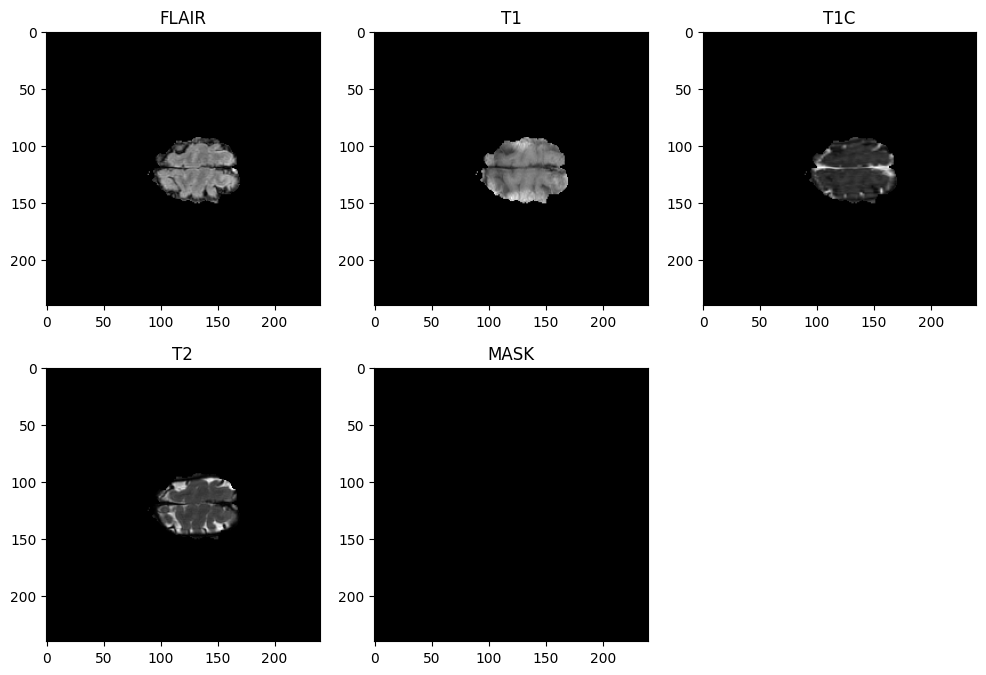

In [ ]:
n_slice = random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:, :, n_slice], cmap="gray")
plt.title("FLAIR")

plt.subplot(232)
plt.imshow(test_image_t1[:, :, n_slice], cmap="gray")
plt.title("T1")

plt.subplot(233)
plt.imshow(test_image_t1c[:, :, n_slice], cmap="gray")
plt.title("T1C")

plt.subplot(234)
plt.imshow(test_image_t2[:, :, n_slice], cmap="gray")
plt.title("T2")

plt.subplot(235)
plt.imshow(test_mask[:, :, n_slice], cmap="gray")
plt.title("MASK")

plt.show()

In [ ]:
combined_x = np.stack([test_image_flair, test_image_t1c, test_image_t2], axis = 3)
combined_x.shape

(240, 240, 155, 3)

In [ ]:
combined_x = combined_x[56:184, 56:184, 13:141]
combined_x.shape
test_mask = test_mask[56:184, 56:184, 13:141]
test_mask.shape

(128, 128, 128)

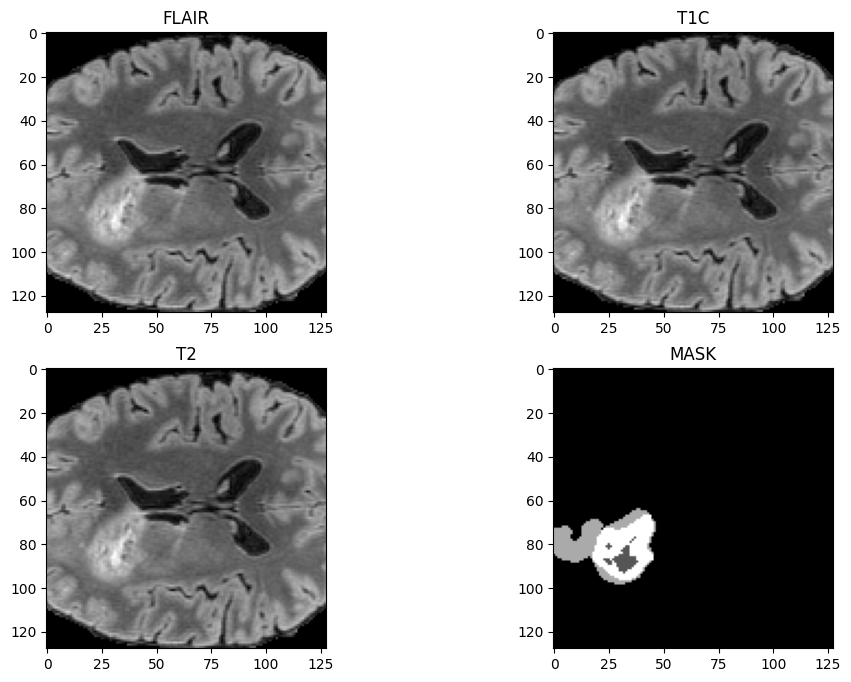

In [ ]:
n_slice = random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(combined_x[:, :, n_slice,0], cmap="gray")
plt.title("FLAIR")

plt.subplot(222)
plt.imshow(combined_x[:, :, n_slice,0], cmap="gray")
plt.title("T1C")

plt.subplot(223)
plt.imshow(combined_x[:, :, n_slice,0], cmap="gray")
plt.title("T2")

plt.subplot(224)
plt.imshow(test_mask[:, :, n_slice], cmap="gray")
plt.title("MASK")

plt.show()

In [ ]:
test_image_t2 = nib.load("/content/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-t1n.nii.gz").get_fdata()
test_image_t2 = test_image_t2.astype(np.uint8)
print(np.unique(test_image_t2))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
test_mask = nib.load("/content/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-seg.nii.gz").get_fdata()
test_mask = test_mask.astype(np.uint8)
print(np.unique(test_mask))

[0 1 2 3]


# IMAGES

In [ ]:
for img in range(len(t2_list)):
  print('Now preparing image and mask number: ', img)

  temp_image_t2 = nib.load(t2_list[img]).get_fdata()
  temp_image_t2 = scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)

  temp_image_flair = nib.load(flair_list[img]).get_fdata()
  temp_image_flair = scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)

  temp_image_t1c = nib.load(t1c_list[img]).get_fdata()
  temp_image_t1c = scaler.fit_transform(temp_image_t1c.reshape(-1, temp_image_t1c.shape[-1])).reshape(temp_image_t1c.shape)

  temp_mask = nib.load(mask_list[img]).get_fdata()
  temp_mask = temp_mask.astype(np.uint8)

  temp_combined_images = np.stack([temp_image_flair, temp_image_t1c, temp_image_t2], axis = 3)

  #crop to a size divisible by 64 to work later with patches by 64x64x64

  temp_combined_images = temp_combined_images[56:184, 56:184, 13:141]
  temp_mask = temp_mask[56:184, 56:184, 13:141]

  val, counts = np.unique(temp_mask, return_counts=True)

  if (1 - (counts[0]/counts.sum())) > 0.01:
    print('Save me')
    temp_mask = to_categorical(temp_mask, num_classes=4)
    np.save('/content/input3dChannel/images/image_'+str(img)+'.npy', temp_combined_images)
    np.save('/content/input3dChannel/masks/mask_'+str(img)+'.npy', temp_mask)
  else:
    print('Skip me')


In [ ]:
import splitfolders

input_folder = '/content/input3dChannel'
output_folder = '/content/input_data_128'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None)

In [2]:
import os


def load_img(img_dir, img_list):
  images = []
  for i, img_name in enumerate(img_list):
    if (img_name.split('.')[-1] == 'npy'):
      image = np.load(img_dir+ '/' +img_name)

      images.append(image)

  images = np.array(images)
  return(images)


def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

  L = len(img_list)

  while True:

    batch_start = 0
    batch_end = batch_size

    while batch_start < L:
      limit = min(batch_end, L)
      X = load_img(img_dir, img_list[batch_start:limit])
      Y = load_img(mask_dir, mask_list[batch_start:limit])

      yield X, Y

      batch_start += batch_size
      batch_end += batch_size

260
260


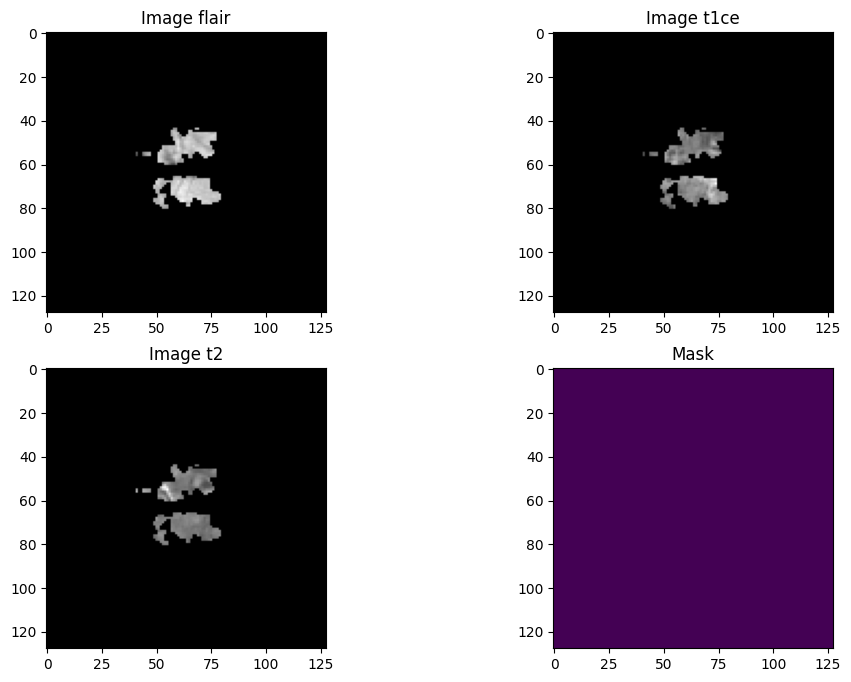

In [ ]:
from matplotlib import pyplot as plt
import random
import numpy as np


train_img_dir = '/content/drive/MyDrive/brats23/Little_brats2023/input_data_128/train/images'
train_mask_dir = '/content/drive/MyDrive/brats23/Little_brats2023/input_data_128/train/masks'
train_img_list = sorted(os.listdir(train_img_dir))
train_mask_list = sorted(os.listdir(train_mask_dir))

print(len(train_img_list))
print(len(train_mask_list))

batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list, train_mask_dir, train_mask_list, batch_size)

img, msk = train_img_datagen.__next__()

img_num  = random.randint(0, img.shape[0]-1)
test_img = img[img_num]
test_mask = msk[img_num]
test_mask = np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()


In [3]:
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.metrics import MeanIoU

kernel_initializer =  'he_uniform' #Try others if you want

def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    s = inputs

    #Contraction path
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)

    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)

    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)

    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)

    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c5)

    #Expansive path
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)

    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)

    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)

    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)

    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    #compile model outside of this function to make it flexible.
    model.summary()

    return model

#Test if everything is working ok.
model = simple_unet_model(240, 240, 144, 3, 4)
print(model.input_shape)
print(model.output_shape)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 144, 3)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d (Conv3D)     │ (None, 240, 240,  │      1,312 │ input_layer[0][0] │
│                     │ 144, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 240, 240,  │          0 │ conv3d[0][0]      │
│                     │ 144, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_1 (Conv3D)   │ (None, 240, 240,  │      6,928 │ dropout[0][0]     │
│                     │ 144, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d       │ (None, 120, 120,  │          0 │ conv3d_1[0][0]    │
│ (MaxPooling3D)      │ 72, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_2 (Conv3D)   │ (None, 120, 120,  │     13,856 │ max_pooling3d[0]… │
│                     │ 72, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 120, 120,  │          0 │ conv3d_2[0][0]    │
│                     │ 72, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_3 (Conv3D)   │ (None, 120, 120,  │     27,680 │ dropout_1[0][0]   │
│                     │ 72, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_1     │ (None, 60, 60,    │          0 │ conv3d_3[0][0]    │
│ (MaxPooling3D)      │ 36, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_4 (Conv3D)   │ (None, 60, 60,    │     55,360 │ max_pooling3d_1[… │
│                     │ 36, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 60, 60,    │          0 │ conv3d_4[0][0]    │
│                     │ 36, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_5 (Conv3D)   │ (None, 60, 60,    │    110,656 │ dropout_2[0][0]   │
│                     │ 36, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_2     │ (None, 30, 30,    │          0 │ conv3d_5[0][0]    │
│ (MaxPooling3D)      │ 18, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_6 (Conv3D)   │ (None, 30, 30,    │    221,312 │ max_pooling3d_2[… │
│                     │ 18, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 30, 30,    │          0 │ conv3d_6[0][0]    │
│                     │ 18, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_7 (Conv3D)   │ (None, 30, 30,    │    442,496 │ dropout_3[0][0]   │
│                     │ 18, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_3     │ (None, 15, 15, 9, │          0 │ conv3d_7[0][0]  

 Total params: 5,645,828 (21.54 MB)

 Trainable params: 5,645,828 (21.54 MB)

 Non-trainable params: 0 (0.00 B)

(None, 240, 240, 144, 3)
(None, 240, 240, 144, 4)


(128, 128, 128, 4)
(128, 128, 128)


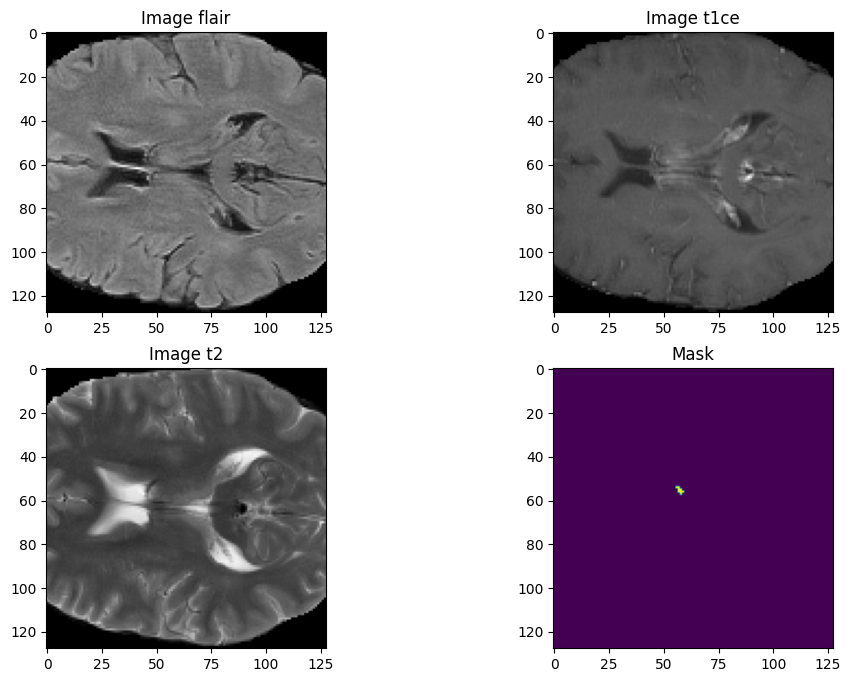

In [ ]:
import os
import numpy as np
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import glob
import random



####################################################
train_img_dir = "/content/drive/MyDrive/brats23/Little_brats2023/input_data_128/train/images"
train_mask_dir = "/content/drive/MyDrive/brats23/Little_brats2023/input_data_128/train/masks"

img_list = sorted(os.listdir(train_img_dir))
msk_list = sorted(os.listdir(train_mask_dir))

num_images = len(os.listdir(train_img_dir))

img_num = random.randint(0,num_images-1)
test_img = np.load(train_img_dir + '/' + img_list[img_num])
test_mask = np.load(train_mask_dir + '/' + msk_list[img_num])
print(test_mask.shape)
test_mask = np.argmax(test_mask, axis=3)
print(test_mask.shape)
n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

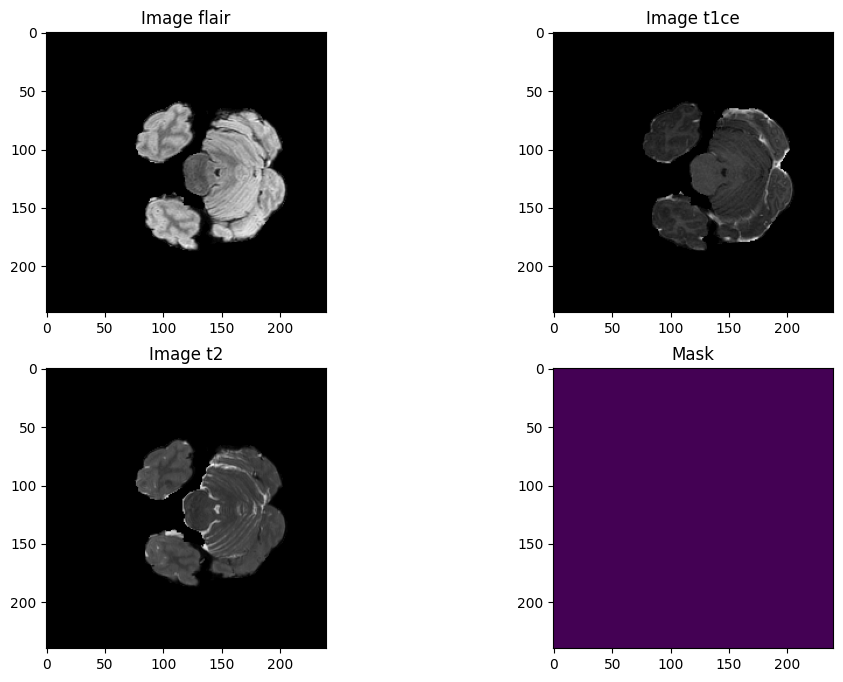

In [ ]:
#Define the image generators for training and validation

train_img_dir = "/content/drive/MyDrive/brats23/240x240x144px/train/images"
train_mask_dir = "/content/drive/MyDrive/brats23/240x240x144px/train/masks"

val_img_dir = "/content/drive/MyDrive/brats23/240x240x144px/val/images"
val_mask_dir = "/content/drive/MyDrive/brats23/240x240x144px/val/masks"

train_img_list= sorted(os.listdir(train_img_dir))
train_mask_list = sorted(os.listdir(train_mask_dir))

val_img_list=sorted(os.listdir(val_img_dir))
val_mask_list = sorted(os.listdir(val_mask_dir))
##################################

########################################################################
batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list,
                                train_mask_dir, train_mask_list, batch_size)

val_img_datagen = imageLoader(val_img_dir, val_img_list,
                                val_mask_dir, val_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
###########################################################################
#Define loss, metrics and optimizer to be used for training
#wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
wt0, wt1, wt2, wt3 = 0.0011, 0.5542, 0.1098, 0.3349

import segmentation_models_3D as sm
import numpy as np
import keras

dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3]))
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

LR = 0.0001
optim = keras.optimizers.Adam(LR)

Segmentation Models: using `keras` framework.


In [ ]:
print(sm.__version__)

1.0.6


In [ ]:
#Fit the model


steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size


# from  simple_3d_unet import simple_unet_model

model = simple_unet_model(IMG_HEIGHT=240,
                          IMG_WIDTH=240,
                          IMG_DEPTH=144,
                          IMG_CHANNELS=3,
                          num_classes=4)

model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
print(model.summary())

print(model.input_shape)
print(model.output_shape)


history=model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=10,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch
          )

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 240, 240, 144,  │              0 │ -                      │
│ (InputLayer)              │ 3)                     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_76 (Conv3D)        │ (None, 240, 240, 144,  │          1,312 │ input_layer_4[0][0]    │
│                           │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_36 (Dropout)      │ (None, 240, 240, 144,  │              0 │ conv3d_76[0][0]        │
│                           │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_77 (Conv3D)        │ (None, 240, 240, 144,  │          6,928 │ dropout_36[0][0]       │
│                           │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling3d_16          │ (None, 120, 120, 72,   │              0 │ conv3d_77[0][0]        │
│ (MaxPooling3D)            │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_78 (Conv3D)        │ (None, 120, 120, 72,   │         13,856 │ max_pooling3d_16[0][0] │
│                           │ 32)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_37 (Dropout)      │ (None, 120, 120, 72,   │              0 │ conv3d_78[0][0]        │
│                           │ 32)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_79 (Conv3D)        │ (None, 120, 120, 72,   │         27,680 │ dropout_37[0][0]       │
│                           │ 32)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling3d_17          │ (None, 60, 60, 36, 32) │              0 │ conv3d_79[0][0]        │
│ (MaxPooling3D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_80 (Conv3D)        │ (None, 60, 60, 36, 64) │         55,360 │ max_pooling3d_17[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_38 (Dropout)      │ (None, 60, 60, 36, 64) │              0 │ conv3d_80[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_81 (Conv3D)        │ (None, 60, 60, 36, 64) │        110,656 │ dropout_38[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling3d_18          │ (None, 30, 30, 18, 64) │              0 │ conv3d_81[0][0]        │
│ (MaxPooling3D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_82 (Conv3D)        │ (None, 30, 30, 18,     │        221,312 │ max_pooling3d_18[0][0] │
│                           │ 128)                   │                │                        │
├──────────────────────

 Total params: 5,645,828 (21.54 MB)

 Trainable params: 5,645,828 (21.54 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 240, 240, 144,  │              0 │ -                      │
│ (InputLayer)              │ 3)                     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_76 (Conv3D)        │ (None, 240, 240, 144,  │          1,312 │ input_layer_4[0][0]    │
│                           │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_36 (Dropout)      │ (None, 240, 240, 144,  │              0 │ conv3d_76[0][0]        │
│                           │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_77 (Conv3D)        │ (None, 240, 240, 144,  │          6,928 │ dropout_36[0][0]       │
│                           │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling3d_16          │ (None, 120, 120, 72,   │              0 │ conv3d_77[0][0]        │
│ (MaxPooling3D)            │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_78 (Conv3D)        │ (None, 120, 120, 72,   │         13,856 │ max_pooling3d_16[0][0] │
│                           │ 32)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_37 (Dropout)      │ (None, 120, 120, 72,   │              0 │ conv3d_78[0][0]        │
│                           │ 32)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_79 (Conv3D)        │ (None, 120, 120, 72,   │         27,680 │ dropout_37[0][0]       │
│                           │ 32)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling3d_17          │ (None, 60, 60, 36, 32) │              0 │ conv3d_79[0][0]        │
│ (MaxPooling3D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_80 (Conv3D)        │ (None, 60, 60, 36, 64) │         55,360 │ max_pooling3d_17[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_38 (Dropout)      │ (None, 60, 60, 36, 64) │              0 │ conv3d_80[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_81 (Conv3D)        │ (None, 60, 60, 36, 64) │        110,656 │ dropout_38[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling3d_18          │ (None, 30, 30, 18, 64) │              0 │ conv3d_81[0][0]        │
│ (MaxPooling3D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_82 (Conv3D)        │ (None, 30, 30, 18,     │        221,312 │ max_pooling3d_18[0][0] │
│                           │ 128)                   │                │                        │
├──────────────────────

 Total params: 5,645,828 (21.54 MB)

 Trainable params: 5,645,828 (21.54 MB)

 Non-trainable params: 0 (0.00 B)

None
(None, 240, 240, 144, 3)
(None, 240, 240, 144, 4)
Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 2019s 11s/step - accuracy: 0.8843 - iou_score: 0.1851 - loss: 1.0042 - val_accuracy: 0.9726 - val_iou_score: 0.3343 - val_loss: 0.9471
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1978s 11s/step - accuracy: 0.9800 - iou_score: 0.3798 - loss: 0.9358 - val_accuracy: 0.9712 - val_iou_score: 0.3466 - val_loss: 0.9397
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1962s 11s/step - accuracy: 0.9846 - iou_score: 0.4313 - loss: 0.9162 - val_accuracy: 0.9771 - val_iou_score: 0.3736 - val_loss: 0.9298
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1994s 11s/step - accuracy: 0.9861 - iou_score: 0.4569 - loss: 0.9069 - val_accuracy: 0.9814 - val_iou_score: 0.4019 - val_loss: 0.9212
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 2009s 11s/step - accuracy: 0.9863 - iou_score: 0.4693 - loss: 0.9022 - val_accuracy: 0.9820 - val_iou_score: 0.4134 - val_loss: 0.9177
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1961s 11s/step - accuracy: 0.9

In [ ]:
model.save('/content/saved_model10_epochs.keras')

In [ ]:
import tensorflow as tf
import segmentation_models_3D as sm
import numpy as np
import keras

# Definisci i pesi delle classi per DiceLoss
wt0, wt1, wt2, wt3 = 0.1,0.30,0.30,0.30
#wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3]))
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

#LR = 0.0001
LR = 0.0001

optim = keras.optimizers.Adam(LR)

# Funzione wrapper per la perdita combinata
def dice_loss_plus_1focal_loss():
    return dice_loss + (1 * focal_loss)

# Funzione per ricostruire SumOfLosses
def sum_of_losses_from_config(config):
    return dice_loss_plus_1focal_loss()

# Funzione per ricostruire IOUScore
def iou_score_from_config(config):
    return sm.metrics.IOUScore(threshold=0.5)

# Mappa dei tuoi oggetti personalizzati
custom_objects = {
    'DiceLoss': sm.losses.DiceLoss,
    'CategoricalFocalLoss': sm.losses.CategoricalFocalLoss,
    'SumOfLosses': sum_of_losses_from_config,  # Simula il metodo from_config
    'dice_loss_plus_1focal_loss': dice_loss_plus_1focal_loss,
    'IOUScore': iou_score_from_config,  # Simula il metodo from_config
    'Adam': keras.optimizers.Adam,
}

# Carica il modello salvato
model = tf.keras.models.load_model(
    "../../saved_model.keras",
    custom_objects=custom_objects
)

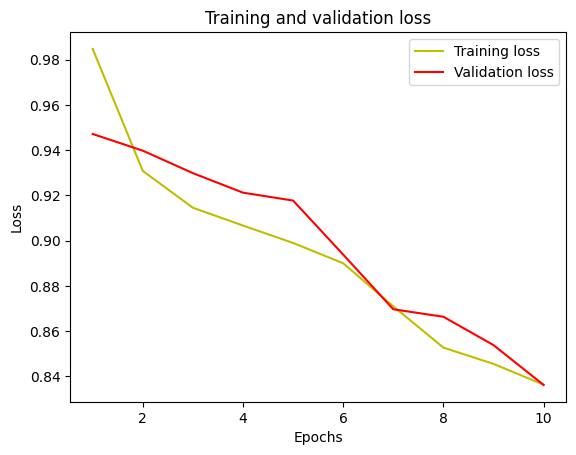

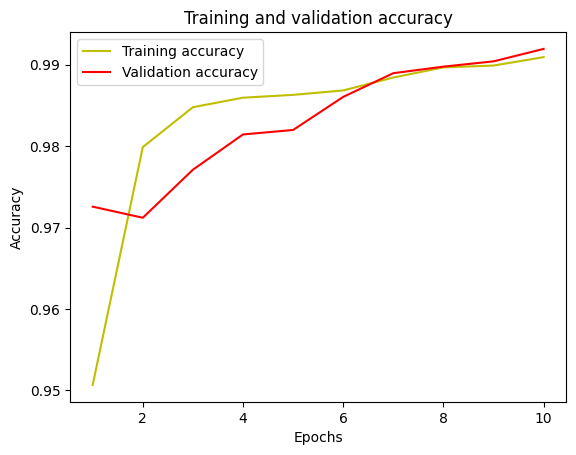

In [ ]:
#plot the training and validation IoU and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

save_path = '/content/train_val_loss50epoch.png'

plt.savefig(save_path)
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

save_path = '/content/train_val_acc50epoch.png'

plt.savefig(save_path)

plt.show()

In [ ]:
print('loss: ', loss)
print('val_loss: ', val_loss)
print('acc: ', acc)
print('val_acc: ',val_acc)

loss:  [0.9846948981285095, 0.930763840675354, 0.9145036935806274, 0.906632661819458, 0.8989375233650208, 0.8899698853492737, 0.870922327041626, 0.8526935577392578, 0.8455043435096741, 0.8363021016120911]
val_loss:  [0.9470987915992737, 0.9397202134132385, 0.9297985434532166, 0.921166718006134, 0.9176756143569946, 0.8937904238700867, 0.8696288466453552, 0.8663275837898254, 0.8537890315055847, 0.8362002968788147]
acc:  [0.9506767988204956, 0.9798839688301086, 0.9847826361656189, 0.9859519004821777, 0.986297607421875, 0.9868420958518982, 0.9884276390075684, 0.9896717667579651, 0.9898967742919922, 0.9909292459487915]
val_acc:  [0.9725683331489563, 0.9712064862251282, 0.9771065711975098, 0.9814369082450867, 0.981985330581665, 0.9860502481460571, 0.9889584183692932, 0.9897649884223938, 0.9904130101203918, 0.9919403791427612]


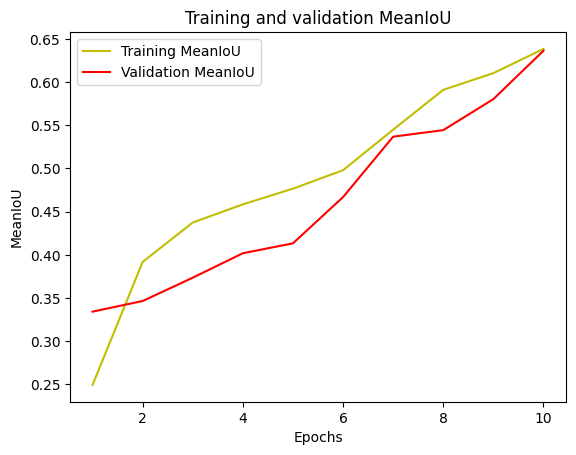

In [ ]:
mean_iou = history.history['iou_score']
val_mean_iou = history.history['val_iou_score']
epochs = range(1, len(mean_iou) + 1)

plt.plot(epochs, mean_iou, 'y', label='Training MeanIoU')
plt.plot(epochs, val_mean_iou, 'r', label='Validation MeanIoU')
plt.title('Training and validation MeanIoU')
plt.xlabel('Epochs')
plt.ylabel('MeanIoU')
plt.legend()
save_path = '/content/Training_validation_MeanIoU_50epoch.png'

plt.savefig(save_path)
plt.show()

In [ ]:
print('mean_iou :', mean_iou)
print('val_mean_iou :', val_mean_iou)

mean_iou : [0.24944257736206055, 0.3918677866458893, 0.4374200999736786, 0.45846137404441833, 0.47662264108657837, 0.49799299240112305, 0.5449174642562866, 0.591015636920929, 0.6103175282478333, 0.638358473777771]
val_mean_iou : [0.3342580795288086, 0.346590518951416, 0.3735661804676056, 0.4018605947494507, 0.4133620262145996, 0.46691766381263733, 0.5368028283119202, 0.5443432331085205, 0.5802574753761292, 0.6363071799278259]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


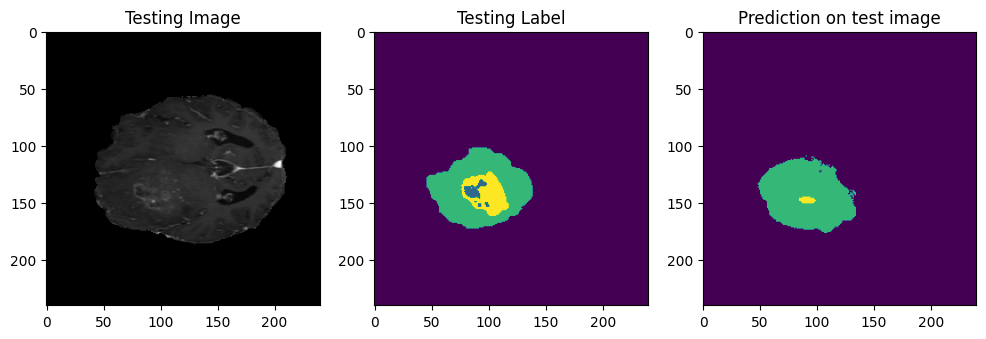

[0 1 2 3]


In [ ]:
import numpy as np
img_num = 99

#601

test_img = np.load("/content/drive/MyDrive/brats23/240x240x144px/train/images/image_1.npy")

test_mask = np.load("/content/drive/MyDrive/brats23/240x240x144px/train/masks/mask_1.npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]



#Plot individual slices from test predictions for verification
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 70
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])

plt.show()

print(np.unique(test_prediction_argmax))
##############################################################################################################


In [ ]:
np.save('/content/pred1.npy', test_prediction)

In [7]:
import tensorflow as tf
import segmentation_models_3D as sm
import numpy as np
import keras

steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size

# Definisci i pesi delle classi per DiceLoss
wt0, wt1, wt2, wt3 = 0.0011, 0.5542, 0.1098, 0.3349
#wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3]))
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

#LR = 0.0001
LR = 0.0001

optim = keras.optimizers.Adam(LR)

# Funzione wrapper per la perdita combinata
def dice_loss_plus_1focal_loss():
    return dice_loss + (1 * focal_loss)

# Funzione per ricostruire SumOfLosses
def sum_of_losses_from_config(config):
    return dice_loss_plus_1focal_loss()

# Funzione per ricostruire IOUScore
def iou_score_from_config(config):
    return sm.metrics.IOUScore(threshold=0.5)

# Mappa dei tuoi oggetti personalizzati
custom_objects = {
    'DiceLoss': sm.losses.DiceLoss,
    'CategoricalFocalLoss': sm.losses.CategoricalFocalLoss,
    'SumOfLosses': sum_of_losses_from_config,  # Simula il metodo from_config
    'dice_loss_plus_1focal_loss': dice_loss_plus_1focal_loss,
    'IOUScore': iou_score_from_config,  # Simula il metodo from_config
    'Adam': keras.optimizers.Adam,
}

# Carica il modello salvato
model = tf.keras.models.load_model(
    "saved_model10_epochs.keras",
    custom_objects=custom_objects
)

model.compile(optimizer=optim, loss=total_loss, metrics=metrics)

# Continua l'addestramento
history = model.fit(
    train_img_datagen,
    steps_per_epoch=steps_per_epoch,
    epochs=15,  # Numero di epoche aggiuntive
    verbose=1,
    validation_data=val_img_datagen,
    validation_steps=val_steps_per_epoch
)

Segmentation Models: using `keras` framework.
Epoch 1/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 2385s 11s/step - accuracy: 0.9912 - iou_score: 0.6408 - loss: 0.8370 - val_accuracy: 0.9919 - val_iou_score: 0.6473 - val_loss: 0.8311
Epoch 2/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 2017s 11s/step - accuracy: 0.9914 - iou_score: 0.6534 - loss: 0.8317 - val_accuracy: 0.9919 - val_iou_score: 0.6630 - val_loss: 0.8261
Epoch 3/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 1991s 11s/step - accuracy: 0.9919 - iou_score: 0.6683 - loss: 0.8277 - val_accuracy: 0.9913 - val_iou_score: 0.6580 - val_loss: 0.8271
Epoch 4/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 1953s 11s/step - accuracy: 0.9920 - iou_score: 0.6716 - loss: 0.8271 - val_accuracy: 0.9926 - val_iou_score: 0.6879 - val_loss: 0.8190
Epoch 5/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 1875s 11s/step - accuracy: 0.9927 - iou_score: 0.6932 - loss: 0.8200 - val_accuracy: 0.9925 - val_iou_score: 0.6933 - val_loss: 0.8175
Epoch 6/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 1877s 11s/step - accuracy: 0.9928 - iou

In [8]:
model.save('/content/saved_model25_epochs.keras')

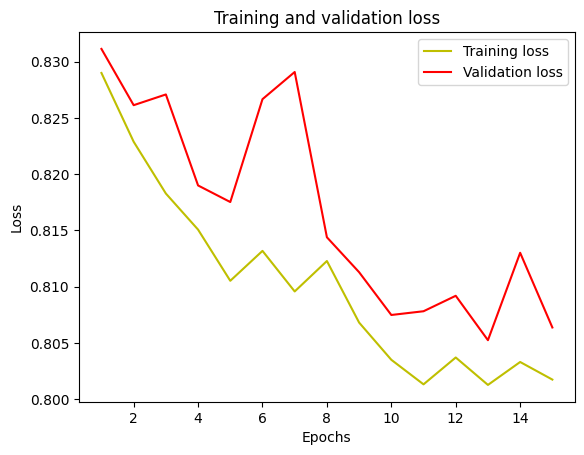

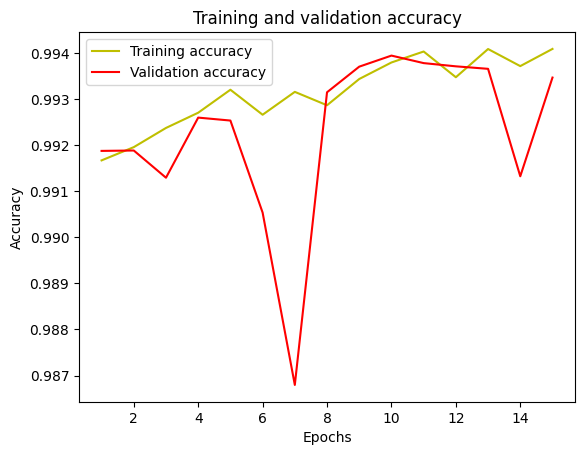

In [9]:
#plot the training and validation IoU and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

save_path = '/content/train_val_loss50epoch.png'

plt.savefig(save_path)
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

save_path = '/content/train_val_acc50epoch.png'

plt.savefig(save_path)

plt.show()

In [10]:
print('loss: ', loss)
print('val_loss: ', val_loss)
print('acc: ', acc)
print('val_acc: ',val_acc)

loss:  [0.8289822936058044, 0.8228779435157776, 0.8182780146598816, 0.8150737881660461, 0.8105298280715942, 0.8131853342056274, 0.8095836639404297, 0.8122861981391907, 0.8068205714225769, 0.8035155534744263, 0.8013361096382141, 0.8037203550338745, 0.8012847304344177, 0.8033206462860107, 0.8017584085464478]
val_loss:  [0.8311167359352112, 0.8261213302612305, 0.8270737528800964, 0.8189948201179504, 0.8175228834152222, 0.8266550898551941, 0.8290680646896362, 0.8143941164016724, 0.8112935423851013, 0.8074948787689209, 0.807826042175293, 0.8091983199119568, 0.8052561283111572, 0.8130173683166504, 0.8063850998878479]
acc:  [0.9916684627532959, 0.9919558167457581, 0.9923723340034485, 0.9927027821540833, 0.993201494216919, 0.9926589727401733, 0.9931551218032837, 0.9928645491600037, 0.9934344291687012, 0.9937928318977356, 0.9940307140350342, 0.9934727549552917, 0.994084894657135, 0.9937140941619873, 0.9940870404243469]
val_acc:  [0.9918743371963501, 0.9918829202651978, 0.9912922382354736, 0.992

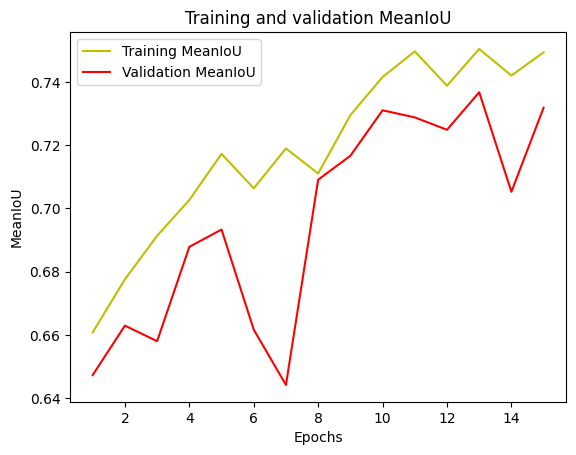

In [11]:
mean_iou = history.history['iou_score']
val_mean_iou = history.history['val_iou_score']
epochs = range(1, len(mean_iou) + 1)

plt.plot(epochs, mean_iou, 'y', label='Training MeanIoU')
plt.plot(epochs, val_mean_iou, 'r', label='Validation MeanIoU')
plt.title('Training and validation MeanIoU')
plt.xlabel('Epochs')
plt.ylabel('MeanIoU')
plt.legend()
save_path = '/content/Training_validation_MeanIoU_50epoch.png'

plt.savefig(save_path)
plt.show()

In [12]:
print('mean_iou :', mean_iou)
print('val_mean_iou :', val_mean_iou)

mean_iou : [0.6608325839042664, 0.6776003241539001, 0.6913484334945679, 0.7026567459106445, 0.717246949672699, 0.7063543200492859, 0.7189677953720093, 0.7110283970832825, 0.7294730544090271, 0.74151611328125, 0.7496387362480164, 0.7387928366661072, 0.7504086494445801, 0.7419852018356323, 0.7493334412574768]
val_mean_iou : [0.6473428606987, 0.662962794303894, 0.6580442190170288, 0.6878547072410583, 0.6933276057243347, 0.6616960167884827, 0.64422208070755, 0.709079921245575, 0.7166370749473572, 0.7310116291046143, 0.7287736535072327, 0.7248542904853821, 0.7367232441902161, 0.7052667737007141, 0.7318444848060608]


In [6]:
import tensorflow as tf
import segmentation_models_3D as sm
import numpy as np
import keras


# Definisci i pesi delle classi per DiceLoss
wt0, wt1, wt2, wt3 = 0.0011, 0.5542, 0.1098, 0.3349
#wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3]))
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

#LR = 0.0001
LR = 0.0001

optim = keras.optimizers.Adam(LR)

# Funzione wrapper per la perdita combinata
def dice_loss_plus_1focal_loss():
    return dice_loss + (1 * focal_loss)

# Funzione per ricostruire SumOfLosses
def sum_of_losses_from_config(config):
    return dice_loss_plus_1focal_loss()

# Funzione per ricostruire IOUScore
def iou_score_from_config(config):
    return sm.metrics.IOUScore(threshold=0.5)

# Mappa dei tuoi oggetti personalizzati
custom_objects = {
    'DiceLoss': sm.losses.DiceLoss,
    'CategoricalFocalLoss': sm.losses.CategoricalFocalLoss,
    'SumOfLosses': sum_of_losses_from_config,  # Simula il metodo from_config
    'dice_loss_plus_1focal_loss': dice_loss_plus_1focal_loss,
    'IOUScore': iou_score_from_config,  # Simula il metodo from_config
    'Adam': keras.optimizers.Adam,
}

# Carica il modello salvato
model = tf.keras.models.load_model(
    "C:/Users/simon/Desktop/Universita/Tirocinio/saved_model25_epochs.keras",
    custom_objects=custom_objects
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 70s 70s/step


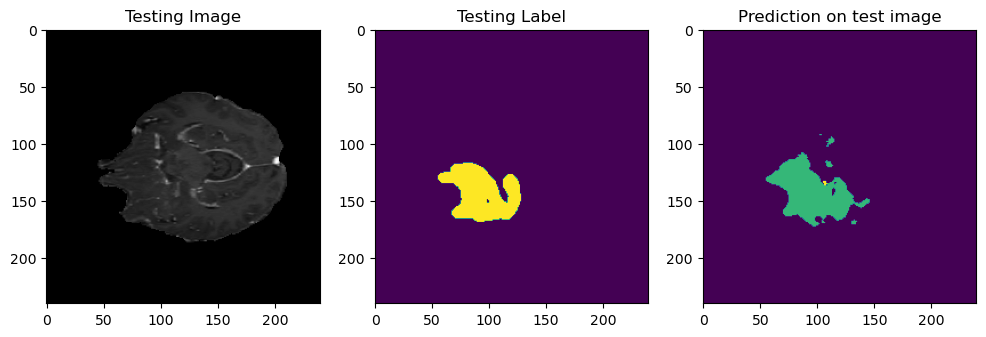

[0 1 2 3]


In [9]:
import numpy as np
img_num = 99

#601

test_img = np.load("/Users/simon/Desktop/Universita/Tirocinio/240x240x144px/train/images/image_1.npy")

test_mask = np.load("/Users/simon/Desktop/Universita/Tirocinio/240x240x144px/train/masks/mask_1.npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]



#Plot individual slices from test predictions for verification
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 60
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])

plt.show()

print(np.unique(test_prediction_argmax))
##############################################################################################################
